In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data/train.csv')

In [7]:
data.shape

(300000, 26)

In [8]:
data.dtypes

id          int64
cat0       object
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cont0     float64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
cont11    float64
cont12    float64
cont13    float64
target    float64
dtype: object

In [46]:
#No null data because i love playground datasets
data.isna().sum() / data.shape[0]

id        0.0
cat0      0.0
cat1      0.0
cat2      0.0
cat3      0.0
cat4      0.0
cat5      0.0
cat6      0.0
cat7      0.0
cat8      0.0
cat9      0.0
cont0     0.0
cont1     0.0
cont2     0.0
cont3     0.0
cont4     0.0
cont5     0.0
cont6     0.0
cont7     0.0
cont8     0.0
cont9     0.0
cont10    0.0
cont11    0.0
cont12    0.0
cont13    0.0
target    0.0
dtype: float64

In [67]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,300000.0,250018.576947,144450.150010,1.000000,124772.500000,250002.500000,375226.500000,499999.000000
cont0,300000.0,0.524634,0.204875,-0.093505,0.370451,0.492208,0.654793,1.052666
cont1,300000.0,0.506649,0.235269,-0.055105,0.352307,0.615156,0.688150,0.851746
cont2,300000.0,0.444115,0.200089,-0.060274,0.314121,0.457271,0.554835,1.017689
cont3,300000.0,0.446214,0.238669,0.134760,0.214572,0.377823,0.719758,1.006469
cont4,300000.0,0.455471,0.200695,0.189216,0.279853,0.411351,0.621808,0.994050
cont5,300000.0,0.508337,0.231612,-0.087247,0.338747,0.441384,0.709515,1.044433
cont6,300000.0,0.478345,0.192432,0.043953,0.339896,0.410090,0.604246,1.093312
cont7,300000.0,0.455904,0.204493,0.208703,0.278041,0.360736,0.639388,1.036541
cont8,300000.0,0.459321,0.220642,0.004041,0.308655,0.425801,0.541525,1.014156


# Univariate analysis

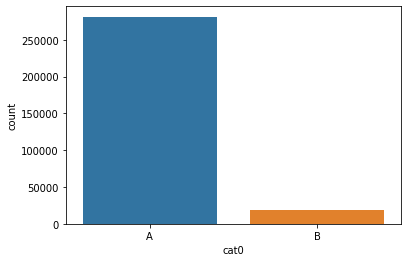

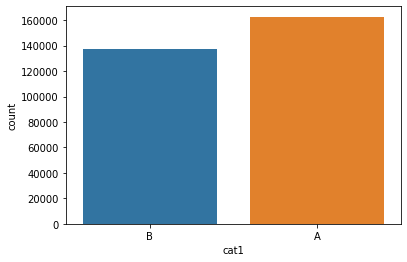

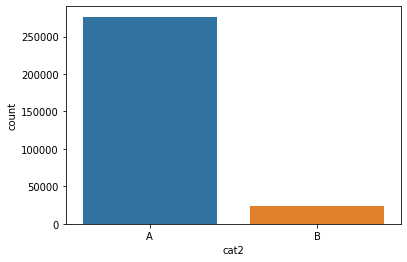

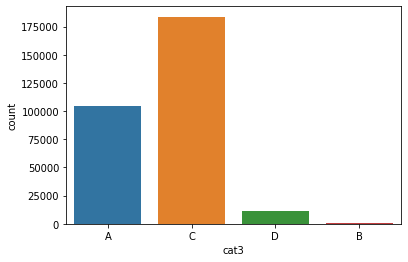

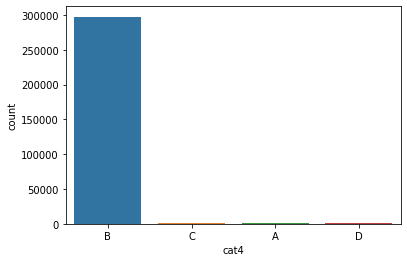

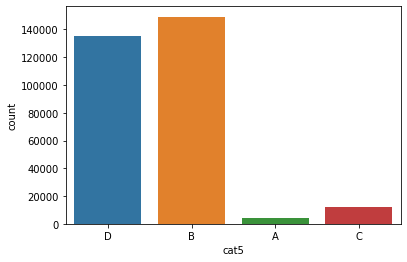

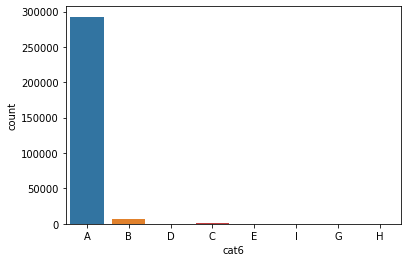

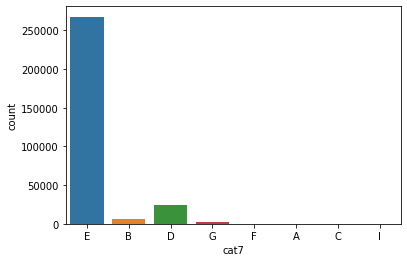

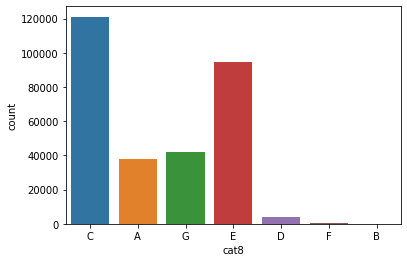

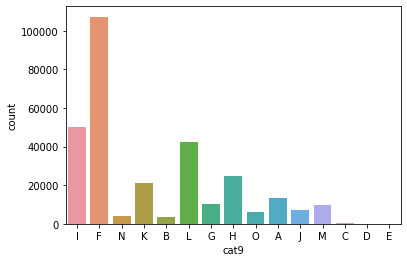

In [22]:
# plot distributions of each categorical column in data
for col in data.select_dtypes(include='object'):
    plt.figure()
    sns.countplot(data[col])

Inference: Large skew for cat0, cat2, cat4, cat6, cat7 while large cardinality for cat8 and cat9

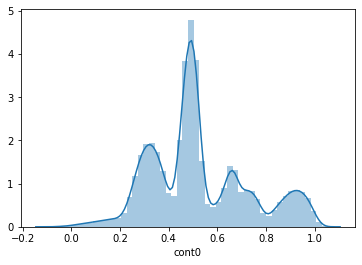

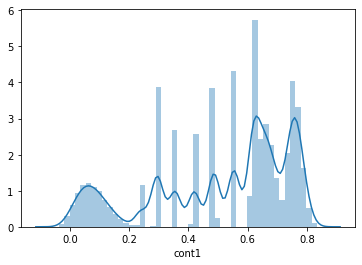

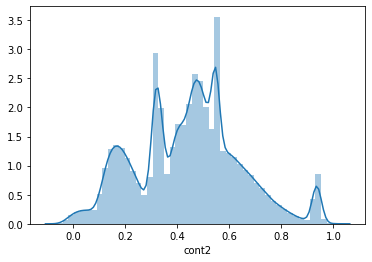

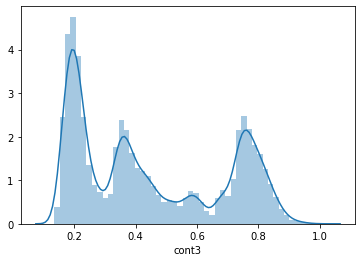

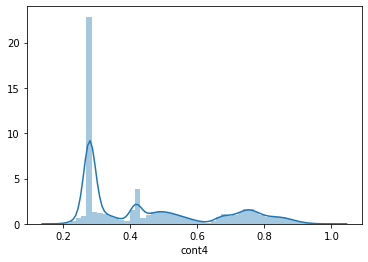

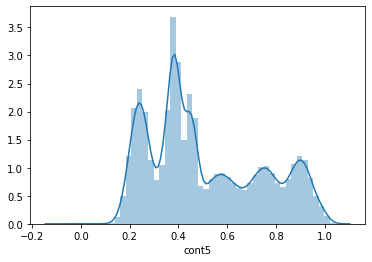

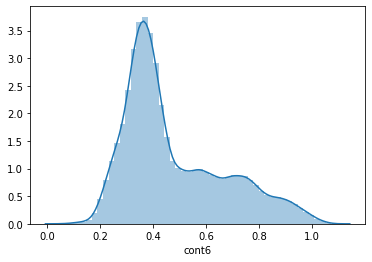

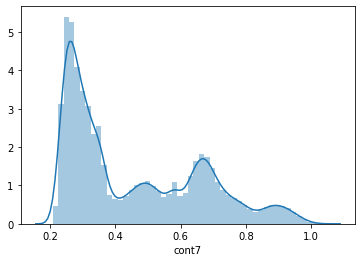

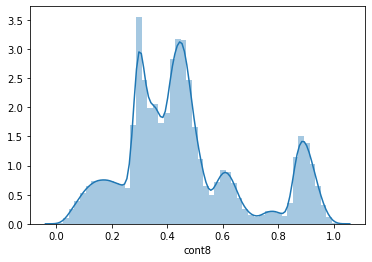

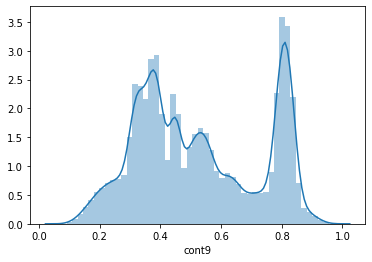

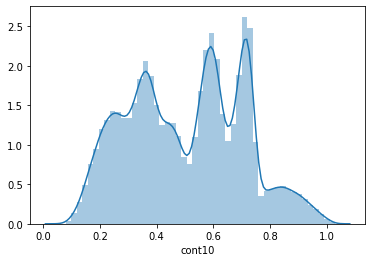

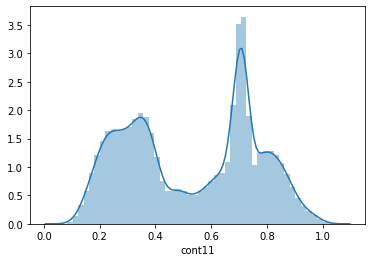

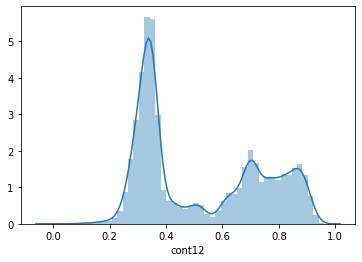

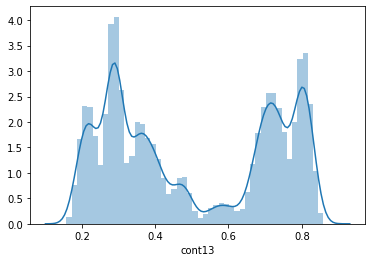

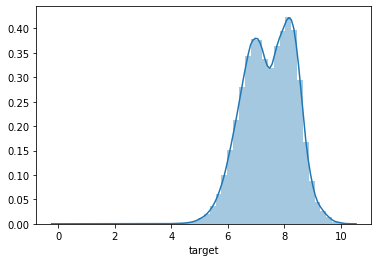

In [51]:
# plot distributions of each numerical column in data
for col in data.drop('id', axis=1).select_dtypes(include=np.number):
    plt.figure()
    sns.distplot(data[col])

# Compare Target Vs. Features 

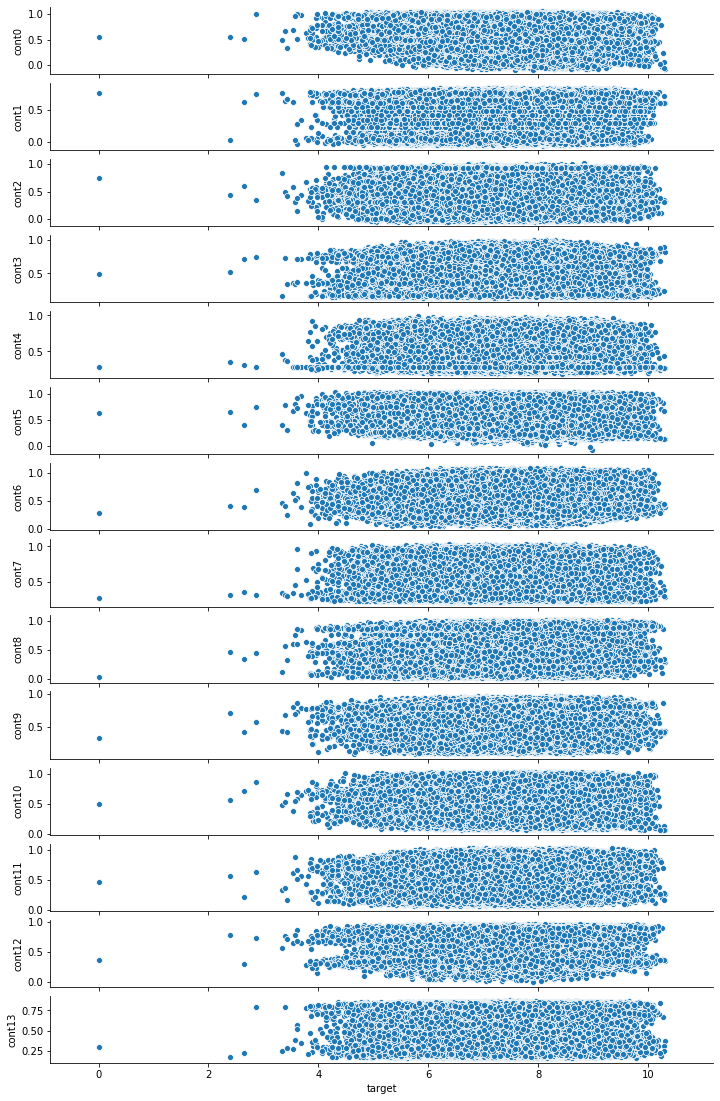

In [59]:
g = sns.pairplot(data.drop('id', axis=1).select_dtypes(include=np.number), y_vars=data.drop(['id', 'target'], axis=1).select_dtypes(include=np.number).columns.tolist(), x_vars=['target'])
g.fig.set_size_inches(15,15)

### Heatmap of Correlation between Numerical Columns

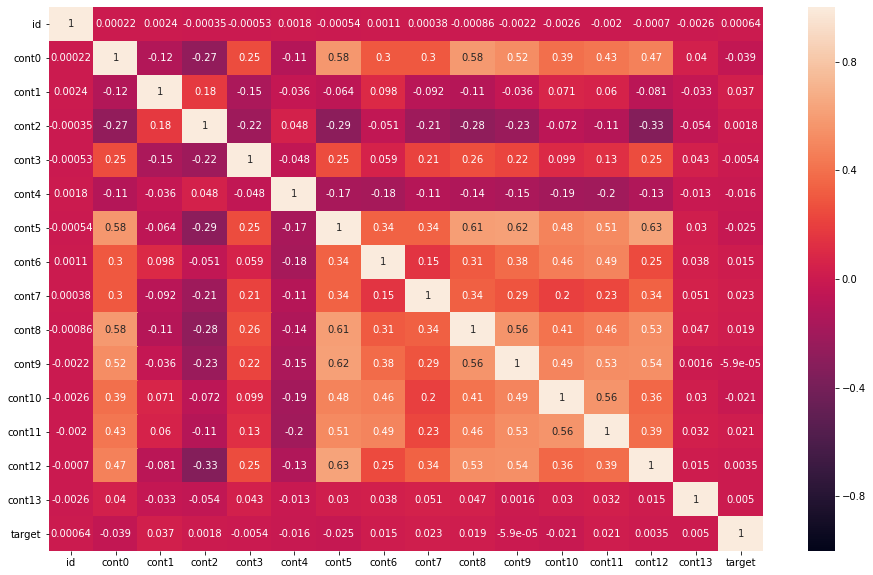

In [64]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

### Plot Categorical vs Target 

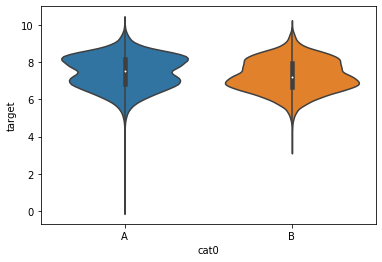

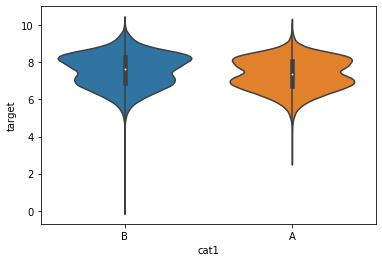

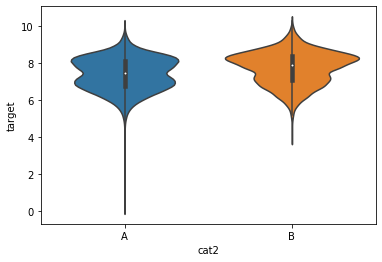

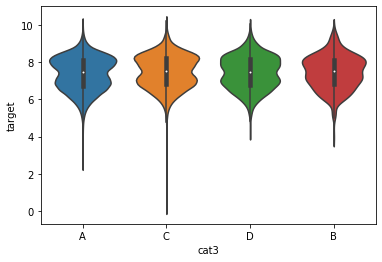

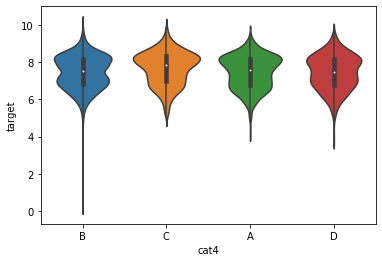

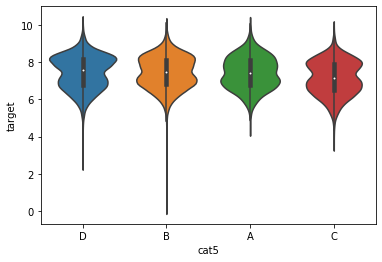

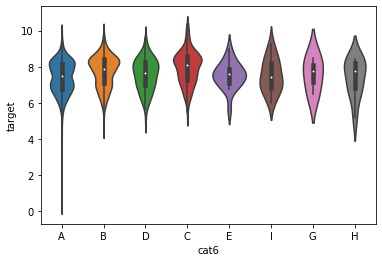

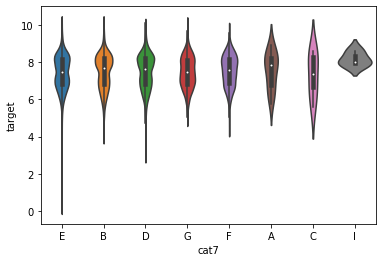

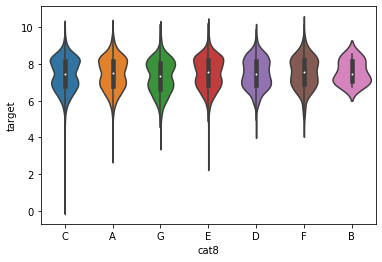

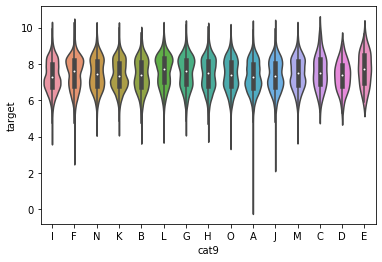

In [66]:
for col in data.select_dtypes(include='object'):
    plt.figure()
    sns.violinplot(data=data, x=col, y='target')